<a href="https://colab.research.google.com/github/marcocenl/bedu-proyecto2-Vinografo/blob/main/Proyecto_2_Proyecto_Vinografo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **🍷 Vinografo:** Un enfoque Data-Driven para comprender la calidad del vino.


##**🔎 Tabla de contenidos**

*   🤯 ¿Cuál es la necesidad o problema a resolver?
*   🏢 Consultas del negocio
*   📊 Base de datos
*   👉 Descripción de las variables
*   ⭐️ Desarrollo del proyecto: Análisis exploratorio de datos (EDA)
*   🍷 Conclusiones finales





##**🤯 ¿Cuál es la necesidad o problema a resolver?**

La calidad del vino es influenciada por una variedad de factores, como sus propiedades químicas y características organolépticas. Resolver el desafío de identificar la relación entre estos factores y la calidad del vino nos permitirá no solo comprender mejor los matices que influyen en su sabor y percepción, sino también tener una visión más completa de la complejidad detrás de esta apreciada bebida y la experiencia del consumidor.

Además, al comparar vinos blancos y tintos en términos de calidad, podemos descubrir patrones específicos asociados con cada tipo y arrojar luz sobre posibles diferencias en sus procesos de elaboración.


## **🏢 Consultas del negocio**

1. ¿Entre vino blanco y tinto, qué tipo tuvo mejor calificación en calidad?
2. ¿Existe una relación entre cada factor y la calidad del vino?
3. ¿Cuál es la influencia de la concentración de alcohol en la calidad del vino y cómo se compara esta influencia entre vinos blancos y tintos?


##**📊 Base de datos**

#####**Fuente:**
[Wine Quality Data Set (Red & White Wine)](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine).

  
######**Descripción del dataset:**
*   Este conjunto de datos contiene información de 1599 muestras de vino tinto y 4898 muestras de vino blanco.
*   Debido a problemas de privacidad y logística, no hay datos sobre los tipos de uva, la marca del vino y el precio de venta del vino.

###👉 **Descripción de las variables:**

Las variables de entrada en el conjunto de datos consisten en el **tipo de vino** (ya sea vino tinto o vino blanco) y **métricas de pruebas objetivas** (por ejemplo, niveles de acidez, valores de pH, contenido alcohólico, etc.), mientras que la **variable objetivo/salida** es una puntuación numérica basada en datos sensoriales, que es la mediana de al menos 3 evaluaciones realizadas por expertos en vinos (En una escala del 0 - muy malo a 10 - excelente).

<br>

Para esta consultoría nos enfocaremos en las siguientes 5 variables que comunmente se cree tienen mayor influencia en la calidad percibida del vino:


1.   **Tipo de vino:** El tipo de vino, ya sea tinto o blanco, es uno de los factores más influyentes, ya que afecta fundamentalmente el perfil de sabor, aroma y estructura del vino.
2.   **Acidez fija:** La acidez fija es crucial para la frescura y la viveza del vino. Una acidez equilibrada puede realzar los sabores y mantener el vino en equilibrio.
3. **Azúcar residual:** El nivel de azúcar residual afecta directamente la percepción de dulzura del vino, lo cual puede tener un impacto importante en cómo se percibe el vino en términos de equilibrio y gusto.
4. **pH:** El pH influye en la acidez y la sensación en boca del vino. Un pH adecuado es esencial para mantener la frescura y el equilibrio en el vino.
5. **Alcohol:** El contenido de alcohol afecta la sensación en boca, la intensidad de los sabores y la estructura del vino. Un equilibrio adecuado es esencial para lograr una experiencia agradable.

## **⭐️ Desarrollo del proyecto: Análisis exploratorio de datos (EDA)**

### **1.Inicialización**

Para comenzar este proyecto:

*   Creamos un [repositorio en Github](https://github.com/mariegarciaor/bedu-proyecto2-Vinografo).
*   Importamos la base de datos como <code>wine-quality-white-and-red.csv</code>
*   Importamos las librerias.



In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt


###**2. Carga y descripción de los datos**

In [ ]:
df_vinografo = pd.read_csv('https://raw.githubusercontent.com/mariegarciaor/bedu-proyecto2-Vinografo/main/wine-quality-white-and-red.csv')

In [ ]:
df_vinografo.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2869,white,6.0,0.17,0.29,5.0,0.028,25.0,108.0,0.99076,3.14,0.34,12.3,6
424,white,6.9,0.23,0.38,8.3,0.047,47.0,162.0,0.99540,3.34,0.52,10.5,7
3781,white,7.4,0.25,0.29,6.8,0.020,31.0,113.0,0.99338,3.13,0.29,10.8,6
1373,white,10.7,0.22,0.56,8.2,0.044,37.0,181.0,0.99800,2.87,0.68,9.5,6
5344,red,12.5,0.38,0.60,2.6,0.081,31.0,72.0,0.99960,3.10,0.73,10.5,5


###**3. Exploración inicial**

👉 **Mostramos un resumen de las generalidades del set de datos de vinos con el método `.info()`.**

In [ ]:
df_vinografo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


💡 **Del comando anterior observamos que:**

*   Tenemos 6,497 datos
*   Tenemos un total de 13 columnas
*   Los tipos de datos que tenemos son float64, int64 y object.
*   No contamos con datos nulos pero haremos una comprobación con
`isnull()` y `isna()` para el caso de `isna()` usaremos `.sum()`






In [ ]:
df_vinografo.isnull()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,False,False,False,False,False,False,False,False,False,False,False,False,False
6493,False,False,False,False,False,False,False,False,False,False,False,False,False
6494,False,False,False,False,False,False,False,False,False,False,False,False,False
6495,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df_vinografo.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

👉 **A continuación utilizamos la función `.head()` para ver los primeros registros de la tabla de vinos**

In [ ]:
df_vinografo.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


👉 **Hemos detectado que es necesario transformar las columnas a snake case.**

Para eso utilizamos la siguiente función:

In [ ]:
def pasar_a_snake_case(titulo_columna):
  return titulo_columna.replace(' ', '_')

Luego renombramos las columnas del dataframe:

In [ ]:
df_vinografo.columns = [pasar_a_snake_case(col) for col in df_vinografo.columns ]

Y validamos el cambio:

In [ ]:
df_vinografo.head()

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### **4. Resumen estadístico**

**👉 Creamos una lista con las variables que seleccionamos para analizar.**

In [ ]:
variables_vinografo = ['type','fixed_acidity', 'residual_sugar', 'pH', 'alcohol',	'quality']

👉 **Utilizamos el método `.describe()` para obtener información resumida sobre las columnas seleccionadas y numéricas en el DataFrame.**

In [ ]:
descripcion = df_vinografo[variables_vinografo].describe().T

In [ ]:
descripcion

,count,mean,std,min,25%,50%,75%,max
fixed_acidity,6497.0,7.215307,1.296434,3.80,6.40,7.00,7.70,15.90
residual_sugar,6497.0,5.443235,4.757804,0.60,1.80,3.00,8.10,65.80
pH,6497.0,3.218501,0.160787,2.72,3.11,3.21,3.32,4.01
alcohol,6497.0,10.491801,1.192712,8.00,9.50,10.30,11.30,14.90
quality,6497.0,5.818378,0.873255,3.00,5.00,6.00,6.00,9.00


Con esta función obtuvimos información como la media, la desviación estándar, el mínimo, el máximo y cuartiles de los datos en cada columna de la base de datos de vinos. Lo que nos permitió comprender rápidamente la distribución de datos y detectar posibles problemas en los datos.


👉 **Cálculo de `asimetría` de cada variable.**

La asimetría (skewness en inglés) es una medida estadística que describe la simetría de una distribución de datos.

- Asimetría = 0 indica que la distribución es perfectamente simétrica.
- Valores positivos de asimetría indican que la distribución se sesga hacia la derecha.
- Valores negativos de asimetría indican que la distribución se sesga hacia la izquierda.

Para esto, importamos `skew` de la librería `scipy.stats` para poder crear una función que nos permita calcular la asímetría de cada variable.

In [ ]:
def calcular_asimetria(dataframe, columnas):
  asimetria_resultados = df_vinografo[columnas].skew()
  return asimetria_resultados

variables_numericas = ['fixed_acidity', 'residual_sugar', 'pH', 'alcohol']
asimetria = calcular_asimetria(df_vinografo, variables_numericas)
asimetria

fixed_acidity     1.723290
residual_sugar    1.435404
pH                0.386839
alcohol           0.565718
dtype: float64

La función `calcular_asimetria` toma el DataFrame y calcula la asimetría de un conjunto de variables almacenadas en `variables_numericas`.

Con esto nos dimos cuenta que todos los coeficientes de asimetría son positivos, con lo que podemos entender que la distribución de los datos está sesgada hacia la deecha.


💡 **Conclusiones:**
1.   Para la variable `fixed_acidity`, observamos una asimetría positiva, indicando que hay valores bajos de acidez fija en la distribución de los datos.
2.   En cuanto a `residual_sugar`, se aprecia una fuerte asimetría hacia la derecha debido a que la media es mayor que la mediana, lo que sugiere la presencia de valores extremadamente altos de azúcar residual en la muestra.
3. La variable `pH` exhibe una asimetría positiva, lo que indica que la mayoría de los valores se encuentran en el extremo inferior del rango de pH, sugiriendo una posible acidez predominante.
4. La asimetría de `alcohol` es positiva, sugiriendo que la mayoría de los vinos tienen un contenido de alcohol relativamente bajo en la muestra.

###**5. Categorización de las variables (función vectorizada)**



En nuestro esfuerzo por hacer que la evaluación de calidad sea más accesible y significativa, trabajamos en la creación de una nueva categoría de calidad que reemplazará los valores numéricos con los descriptores 'Alto', 'Medio', 'Bajo'.

Esta nueva aproximación facilitará la toma de decisiones y brindará una comprensión más intuitiva de la calidad de nuestros productos.


👉 Para comenzar quisimos tener un vistazo rápido de las calificaciones que se han asignado a los vinos. Para esto usamos el método `.unique()`

In [ ]:
df_vinografo['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

Luego creamos una columna adicional `'quality_categry'` que categorizara en "low, "medium" y "high" a los vinos según su calificación numérica en la columna `'quality'`

In [ ]:
df_vinografo['quality_category'] = pd.cut(df_vinografo['quality'], bins= [0,5,8,10], labels = ['low','medium','high'])

Obtenemos una muestra del dataframe para confirmar que se han creado los cambios.

In [ ]:
df_vinografo.sample(6)

,type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_category
6070,red,9.7,0.42,0.46,2.1,0.074,5.0,16.0,0.99649,3.27,0.74,12.3,6,medium
6261,red,8.0,0.83,0.27,2.0,0.080,11.0,63.0,0.99652,3.29,0.48,9.8,4,low
3136,white,5.6,0.19,0.27,0.9,0.040,52.0,103.0,0.99026,3.50,0.39,11.2,5,low
292,white,7.4,0.28,0.42,19.8,0.066,53.0,195.0,1.00000,2.96,0.44,9.1,5,low
2027,white,6.9,0.32,0.15,8.1,0.046,51.0,180.0,0.99580,3.13,0.45,8.9,5,low
699,white,7.4,0.31,0.48,14.2,0.042,62.0,204.0,0.99830,3.06,0.59,9.4,5,low


👉 Nos interesó conocer cuál era la distribución de los vinos en estas 3 categorías así que creamos una función que nos permitiera contar y luego mostrar en % la distribución.

In [ ]:
counts = df_vinografo['quality_category'].value_counts()
percentages = (counts/len(df_vinografo))*100

percentages_formatted = percentages.round(2).astype(str) + '%'

df_counts = pd.DataFrame({'Count': counts, 'Percentage': percentages_formatted})
df_counts

,Count,Percentage
medium,4108,63.23%
low,2384,36.69%
high,5,0.08%


##**6. Responder consultas de negocio**

####❓**¿Entre vino blanco y tinto, qué tipo tuvo mejor calificación en calidad?**

Para esto utilizaremos una función que nos permita obtener los porcentajes:

In [ ]:
counts_with_type = df_vinografo.groupby(['type', 'quality_category']).size().unstack(fill_value=0)
totals_by_type = df_vinografo.groupby('type').size()
percentages_with_type = (counts_with_type.div(totals_by_type, axis=0) * 100).round(2).astype(str) + '%'
percentages_with_type['Total'] = totals_by_type

Esta función lo que hace es:
1. Calcular los conteos para cada combinación de 'type' y 'quality_category'
2. Calcular los totales por tipo de vino
3. Calcular los porcentajes para cada tipo de vino
4. Agregar una columna para el total por tipo de vino


In [ ]:
percentages_with_type

quality_category,low,medium,high,Total
type,,,,
red,46.53%,53.47%,0.0%,1599
white,33.48%,66.41%,0.1%,4898


💡 **Conclusiones:**
1.   Ambos vinos tienen mayor concentración de calificaciones medias.
2.   Sin embargo, los vinos con mayor calidad percibida son blancos.




####❓ **¿Existe una relación entre cada factor y la calidad del vino?**

In [ ]:
correlation_matrix = df_vinografo[variables_numericas].corrwith(df_vinografo['quality'])
correlation_matrix

fixed_acidity    -0.076743
residual_sugar   -0.036980
pH                0.019506
alcohol           0.444319
dtype: float64

💡 **Conclusiones:**

1. ` fixed_acidity` la calidad del vino tiende a disminuir ligeramente. Sin embargo, la correlación es bastante baja, por lo que esta relación es débil y podría no ser significativa.
2. `residual_sugar` la correlación tambien es negativa por lo que se entiende que la calidad tiende a disminuir a medida que la cantidad de azucar aumenta.
3. `pH` conforme el pH aumenta y el vino es menos ácido, la calidad tiende a aumentar ligeramente.
4. `alcohol` tiene una correlación positiva relativamente fuerte. Esto sugiere que a medida que el contenido de alcohol en el vino aumenta, la calidad del vino tiende a aumentar significativamente.


👉 Creamos un gráfico de barras para visualizar las correlaciones

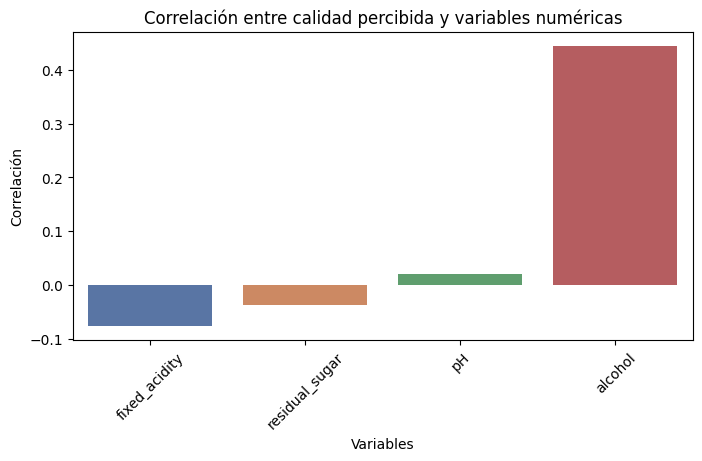

In [ ]:
correlation_df = pd.DataFrame(correlation_matrix, columns=["Correlación"])
plt.figure(figsize=(8, 4))
sns.barplot(x=correlation_df.index, y="Correlación", data=correlation_df, palette='deep')
plt.xlabel('Variables')
plt.ylabel('Correlación')
plt.title('Correlación entre calidad percibida y variables numéricas')
plt.xticks(rotation=45)
plt.show()

####❓**¿Cuál es la influencia de la concentración de alcohol en la calidad del vino y cómo se compara esta influencia entre vinos blancos y tintos?**

In [ ]:
grouped = df_vinografo.groupby('type')
correlation_alcohol_by_type = grouped.apply(lambda x: x['alcohol'].corr(x['quality']))
correlation_alcohol_by_type

type
red      0.476166
white    0.435575
dtype: float64

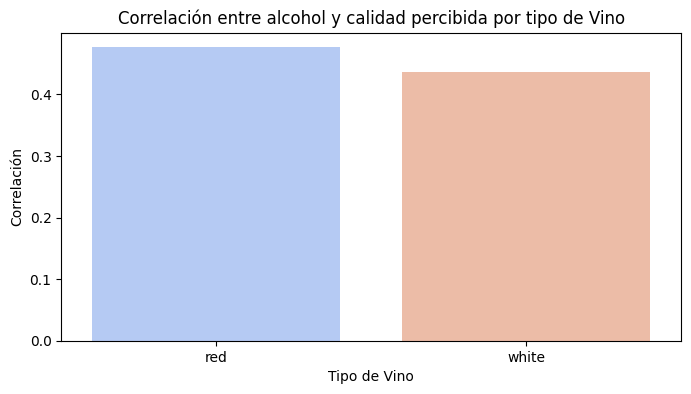

In [ ]:
plt.figure(figsize=(8, 4))  # Ajusta el tamaño del gráfico
sns.barplot(x=correlation_alcohol_by_type.index, y=correlation_alcohol_by_type.values, palette='coolwarm')
plt.xlabel('Tipo de Vino')
plt.ylabel('Correlación')
plt.title('Correlación entre alcohol y calidad percibida por tipo de Vino')
plt.show()

##🍷 **Conclusiones finales**

**En este análisis, evaluamos la relación entre 5 variables y la calidad de los vinos blancos y tintos.**

*   Observamos que la variable 'alcohol' parece estar más fuertemente relacionada con la calidad del vino en comparación con las otras variables, que tienen correlaciones más débiles y podrían no ser tan influyentes en la calidad percibida del vino en este conjunto de datos.
*   La correlación entre el alcohol y la calidad varía según el tipo de vino.
*   En el caso de los vinos tintos, encontramos una correlación positiva significativa entre el alcohol y la calidad, lo que sugiere que un mayor contenido de alcohol tiende a asociarse con una mejor calidad en estos vinos.
*   Por otro lado, en los vinos blancos, la correlación es menos pronunciada y podría indicar que la calidad de los vinos blancos está influenciada por otros factores en mayor medida.
*   Estas diferencias subrayan la importancia de considerar el tipo de vino al evaluar la influencia de los componentes químicos en su calidad, lo que puede ser relevante para la producción y selección de vinos de alta calidad.


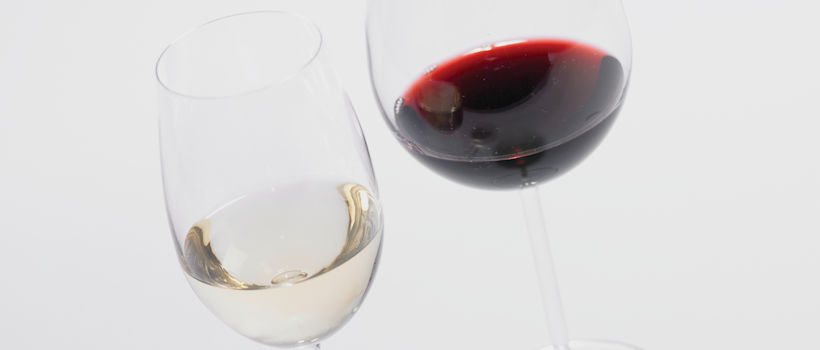